In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import copy
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

x, y = twospirals(400)
x, y = x/10, y.reshape(-1)
xx, yy = np.array(x), np.reshape(y, (-1,1))
print(x.shape, y.shape)

(800, 2) (800,)


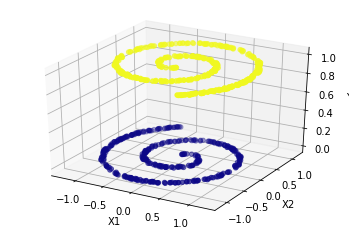

In [3]:
x1 = xx[:,0]
x2 = xx[:,1]

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x1, x2, y, c=y, cmap='plasma')
# ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

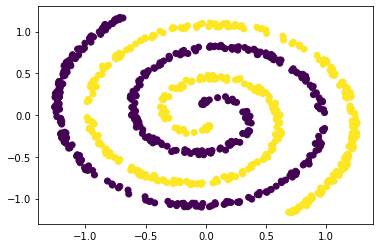

In [4]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=y)

### Using Neural Network

In [135]:
n_hidden = 1
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)
layer3 = tnn.Sigmoid()
# def reposition_break_if_necessary(self:tnn.DoubleReluLinearLayer):
#     pass

In [136]:
%matplotlib tk

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = tnn.CrossEntropyBinary().loss(yout, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(x1, x2, y, c=y, cmap='plasma')
        ax.scatter(x1, x2, yout, c=(yout>0.5).reshape(-1), cmap='plasma')#, c=yout, cmap='plasma')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.8296656066612563


100 Error =  0.6501206053389711


200 Error =  0.6323454915399922


300 Error =  0.6291577864531948


400 Error =  0.6281866039465864


500 Error =  0.6278299281384729


600 Error =  0.6275854027430411


700 Error =  0.6271114006172787


800 Error =  0.6255215017867054


900 Error =  0.6237488532277717


1000 Error =  0.6225865609331102


1100 Error =  0.6215327419780573


1200 Error =  0.6114337143422764


1300 Error =  0.6056504770516478


TclError: invalid command name "pyimage317"

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x1, x2, y, c=y, cmap='plasma')
ax.scatter(x1, x2, yout, c=(yout>0.5).reshape(-1), cmap='plasma')#, c=yout, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [137]:
error = tnn.CrossEntropyBinary().loss(yout, yy)
pre_err = error
error_list = [error,]

## Repeat steps below to add new neuron to the network

In [138]:
from copy import deepcopy

### Adding new neurons at some point with zero output 

In [149]:
new_neurons = 2
noise_new = 0.0
noise_old = 0.0
noise_old_w1 = np.random.normal(loc=0, scale=noise_old, size=layer1.weights.shape)
noise_old_b1 = np.random.normal(loc=0, scale=noise_old, size=layer1.bias.shape)

layer1c = deepcopy(layer1)
layer2c = deepcopy(layer2)

l1_add = tnn.LinearLayer(2, new_neurons, optimizer=optimizer)
l2_add = tnn.DoubleReluLinearLayer(new_neurons, 1, optimizer=optimizer)

new_w1 = np.hstack([layer1.weights+noise_old_w1, l1_add.weights])
new_b1 = np.hstack([layer1.bias+noise_old_b1, l1_add.bias])

i, o = layer2.weights.shape
i_, o_ = l2_add.weights.shape
new_w2_ = np.concatenate([layer2.weights.reshape(2,i//2,o),
                          l2_add.weights.reshape(2,i_//2,o_)*noise_new],
                         axis=1)
new_w2 = new_w2_.reshape(-1, o)
new_b2 = deepcopy(layer2.bias)

## Creating a new network with added neuron

In [150]:
optimizer = tnn.Adam()
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden,
                             weights=new_w1, bias=new_b1,
                             optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1,
                          weights=new_w2, bias=new_b2,
                          optimizer=optimizer)
layer3 = tnn.Sigmoid()

In [151]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = tnn.CrossEntropyBinary().loss(yout, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        out = (yout>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.5397297652501067


100 Error =  0.5251048978812054


200 Error =  0.5059737426161065


300 Error =  0.5017063615010845


400 Error =  0.500289564380757


500 Error =  0.49953767878884536


600 Error =  0.49874460162604806


700 Error =  0.49561637661417174


800 Error =  0.4919333123553234


900 Error =  0.49106139368202634


1000 Error =  0.4903874709975601


1100 Error =  0.48956648583822115


1200 Error =  0.48882294638772605


1300 Error =  0.48861493644989407


1400 Error =  0.48827458188682143


1500 Error =  0.4879318219641054


1600 Error =  0.48771139814770637


1700 Error =  0.48747890459072457


1800 Error =  0.48752844828695496


1900 Error =  0.48728198614244145


2000 Error =  0.48717704106339177


2100 Error =  0.4872562318716875


2200 Error =  0.487015698611545


2300 Error =  0.4871077580329608


2400 Error =  0.48680328864239814


2500 Error =  0.48670366432507167


2600 Error =  0.486637901192605


2700 Error =  0.48660759795517877


2800 Error =  0.486

TclError: invalid command name "pyimage347"

In [152]:
pre_err - error   ### ---> the more the better

0.05314182807225504

In [153]:
pre_err = error
error_list.append(error)

#### If the additional neuron was not helpful, reset the network

In [40]:
layer1 = deepcopy(layer1c)
layer2 = deepcopy(layer2c)

#### Total number of neurons

In [154]:
n_hidden = len(layer1.bias)
n_hidden

7

#### Plots

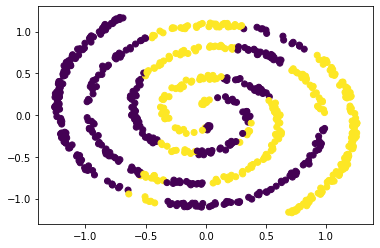

In [155]:
%matplotlib inline
yout = net.forward(xx)
out = (yout>0.5).reshape(-1)
plt.scatter(x1, x2, c=out)

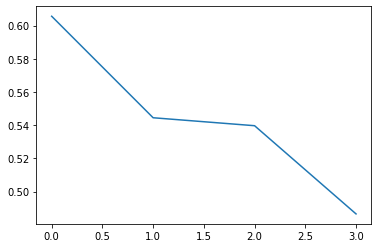

In [156]:
plt.plot(error_list)

### Training the same network end to end -- for comparision

In [157]:
optimizer = tnn.Adam()
net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)
layer3_ = tnn.Sigmoid()

In [158]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout_ = net_.forward(xx)
    dy_ = yout_ - yy
    dx_ = net_.backward(dy_)
    
    net_.update()
    
    if epoch%100 == 0:
        error_ = tnn.CrossEntropyBinary().loss(yout_, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error_)
        ax.clear()
        
        out = (yout_>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error_ < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.7017869571008221


100 Error =  0.5899853028983612


200 Error =  0.5804960448150522


300 Error =  0.5795290534491293


400 Error =  0.5787823965928177


500 Error =  0.5780455161647496


600 Error =  0.5776698605240794


700 Error =  0.5773131570879663


800 Error =  0.5771649519266001


900 Error =  0.5771433515233635


1000 Error =  0.57715718943075


1100 Error =  0.5771443167773004


1200 Error =  0.5771225900900974


1300 Error =  0.5771587294049988


1400 Error =  0.5771807346059178


1500 Error =  0.5771837477563355


1600 Error =  0.5771528278825343


1700 Error =  0.5771774706765626


1800 Error =  0.5771332785949845


1900 Error =  0.5771375127969195


2000 Error =  0.5771798407524652


2100 Error =  0.5771627874076715


2200 Error =  0.5771132197019455


2300 Error =  0.5771434501489667


2400 Error =  0.5771623390689793


2500 Error =  0.5771451015567395


2600 Error =  0.5771303396157811


2700 Error =  0.5771325709496413


2800 Error =  0.5771383230358912



TclError: invalid command name "pyimage358"

In [159]:
error, error_

(0.4865612553593745, 0.577131672970366)

## Add New Layer to the last layer

In [182]:
n_hidden2 = 7
optimizer = tnn.SGD()
w2_layer = tnn.WeightsLayer(n_hidden*2, n_hidden2, optimizer=optimizer)
w3_layer = tnn.WeightsLayer(n_hidden2, 1, optimizer=optimizer)

for epoch in range(100000):
    wout = w3_layer.forward(w2_layer.weights)
    dw = wout - layer2.weights
    dw2 = w3_layer.backward(dw/dw.shape[1]) 
    w2_layer.del_weights = dw2
    
    w2_layer.update()
    w3_layer.update()
    
    if epoch%10000 == 0:
        error__ = (dw**2).mean()
        print(epoch, 'Error = ', error__)

0 Error =  25.64672074169686
10000 Error =  2.4484622515844127e-30
20000 Error =  2.2230734215212666e-30
30000 Error =  2.2230734215212666e-30
40000 Error =  2.2230734215212666e-30
50000 Error =  2.2230734215212666e-30
60000 Error =  2.2230734215212666e-30
70000 Error =  2.2230734215212666e-30
80000 Error =  2.2230734215212666e-30
90000 Error =  2.2230734215212666e-30


In [183]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden,
                          weights=copy.deepcopy(layer1.weights),
                          bias = copy.deepcopy(layer1.bias),
                          optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, n_hidden2,
                                    weights=copy.deepcopy(w2_layer.weights),
                                    optimizer=optimizer)
layer3_ = tnn.DoubleReluLinearLayer(n_hidden2,1,
                                    weights=np.vstack([w3_layer.weights,w3_layer.weights]),
                                    bias = copy.deepcopy(layer2.bias),
                                    optimizer=optimizer)
layer4_ = tnn.Sigmoid()

In [184]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout_ = net_.forward(xx)
    dy_ = yout_ - yy
    dx_ = net_.backward(dy_)
    
    net_.update()
#     layer2_.update()
#     layer3_.update()
    
    if epoch%100 == 0:
        error_ = tnn.CrossEntropyBinary().loss(yout_, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error_)
        ax.clear()
        
        out = (yout_>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error_ < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.4865637225625342


100 Error =  0.4349215085892109


200 Error =  0.36773751112871056


300 Error =  0.3415530596665481


400 Error =  0.3079209721360202


500 Error =  0.22910315845798393


600 Error =  0.19517135327245505


700 Error =  0.1794551915146179


800 Error =  0.17031108063040307


900 Error =  0.11933792018590207


1000 Error =  0.07505461376672123


1100 Error =  0.06721638595950027


1200 Error =  0.06357747285607245


1300 Error =  0.06113050009910927


1400 Error =  0.05901129562239884


1500 Error =  0.05705651629232343


1600 Error =  0.05492247836268811


1700 Error =  0.053659052260520486


1800 Error =  0.05225956012423012


1900 Error =  0.05129000420402632


2000 Error =  0.050190456771499935


2100 Error =  0.048890868033168895


2200 Error =  0.04812298631346991


2300 Error =  0.04749574805688681


2400 Error =  0.04652620218882566


2500 Error =  0.04417525785507765


2600 Error =  0.042549118638717014


2700 Error =  0.040406179972984416


2800

TclError: invalid command name "pyimage447"

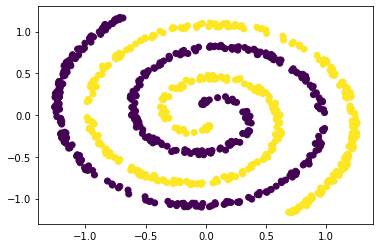

In [185]:
### Well, it worked this time... was not the case with regression problem
%matplotlib inline
yout_ = net_.forward(xx)
out_ = (yout_>0.5).reshape(-1)
plt.scatter(x1, x2, c=out_)

## Add New Layer to the first layer

In [189]:
n_hidden2 = 7
optimizer = tnn.SGD()
w1_layer = tnn.WeightsLayer(2, n_hidden2, optimizer=optimizer)
w2_layer = tnn.WeightsLayer(n_hidden2, n_hidden, optimizer=optimizer)

for epoch in range(100000):
    wout = w2_layer.forward(w1_layer.weights)
    dw = wout - layer1.weights
    dw1 = w2_layer.backward(dw/dw.shape[1]) 
    w1_layer.del_weights = dw1
    
    w2_layer.update()
    w1_layer.update()
    
    if epoch%10000 == 0:
        error__ = (dw**2).mean()
        print(epoch, 'Error = ', error__)

0 Error =  14.176001367435683
10000 Error =  4.72340371783652e-28
20000 Error =  3.685998801963843e-28
30000 Error =  3.685998801963843e-28
40000 Error =  3.685998801963843e-28
50000 Error =  3.685998801963843e-28
60000 Error =  3.685998801963843e-28
70000 Error =  3.685998801963843e-28
80000 Error =  3.685998801963843e-28
90000 Error =  3.685998801963843e-28


In [190]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden2,
                          weights=copy.deepcopy(w1_layer.weights),
                          optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden2, n_hidden,
                          weights=np.vstack([w2_layer.weights, w2_layer.weights]),
                          bias = copy.deepcopy(layer1.bias),
                          optimizer=optimizer)
layer3_ = tnn.DoubleReluLinearLayer(n_hidden,1,
                          weights=copy.deepcopy(layer2.weights),
                          bias = copy.deepcopy(layer2.bias),
                          optimizer=optimizer)
layer4_ = tnn.Sigmoid()

In [191]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout_ = net_.forward(xx)
    dy_ = yout_ - yy
    dx_ = net_.backward(dy_)
    
    net_.update()
#     layer1_.update()
#     layer2_.update()
    
    if epoch%100 == 0:
        error_ = tnn.CrossEntropyBinary().loss(yout_, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error_)
        ax.clear()
        
        out = (yout_>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error_ < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.48656372256253405


100 Error =  0.47539960228131006


200 Error =  0.4634864399393021


300 Error =  0.43611544250140627


400 Error =  0.39304379830892267


500 Error =  0.3278450424248634


600 Error =  0.2785395211814155


700 Error =  0.24759943931598918


800 Error =  0.13472375851419716


900 Error =  0.10413159591171502


1000 Error =  0.09211451513969168


1100 Error =  0.06776565954143775


1200 Error =  0.02428173605482946


1300 Error =  0.017427222974653454


1400 Error =  0.014147139129344203


1500 Error =  0.011592165819871087


1600 Error =  0.010050903642654391


1700 Error =  0.008948948423907538


1800 Error =  0.008079707748010454


1900 Error =  0.007353308840415349


2000 Error =  0.0066605010988458006


2100 Error =  0.006123392332280069


2200 Error =  0.0056786809457769725


2300 Error =  0.005324403679206181


2400 Error =  0.005015083821356319


2500 Error =  0.0047350365739312235


2600 Error =  0.004497685571324144


2700 Error =  0.0042893163

TclError: invalid command name "pyimage472"

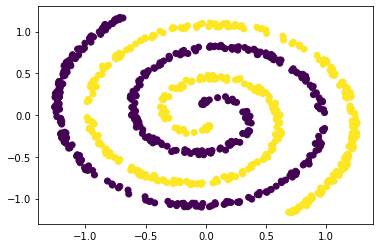

In [192]:
### It works even better.. it fitted even to our threshold
%matplotlib inline
yout_ = net_.forward(xx)
out_ = (yout_>0.5).reshape(-1)
plt.scatter(x1, x2, c=out_)

### Training the same network from scratch

In [193]:
n_hidden2, n_hidden

(7, 7)

In [194]:
optimizer = tnn.Adam()

net_0 = tnn.AutoForm(new_layers=True)
layer1_0 = tnn.LinearLayer(2, n_hidden2,
                          optimizer=optimizer)
layer2_0 = tnn.DoubleReluLinearLayer(n_hidden2, n_hidden,
                                    optimizer=optimizer)
layer3_0 = tnn.DoubleReluLinearLayer(n_hidden,1,
                                    optimizer=optimizer)

In [195]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout_0 = net_0.forward(xx)
    dy_0 = yout_0 - yy
    dx_0 = net_0.backward(dy_0)
    
    net_0.update()
    
    if epoch%100 == 0:
        error_0 = tnn.CrossEntropyBinary().loss(yout_0, yy)#(dy**2).mean()
        print(epoch, 'Error = ', error_0)
        ax.clear()
        
        out = (yout_0>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error_0 < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  5.4118524904939225


100 Error =  0.581147558562958


200 Error =  0.5562168795569934


300 Error =  0.5471995006650042


400 Error =  0.5152153290756136


500 Error =  0.4360489651425901


600 Error =  0.2811135276063317


700 Error =  0.2196701788759855


800 Error =  0.20142009026038377


900 Error =  0.1643034826054196


1000 Error =  0.15095680075042953


1100 Error =  0.1467468146907308


1200 Error =  0.1354269256041689


1300 Error =  0.13093257114014825


1400 Error =  0.13078296277409115


1500 Error =  0.12725220535226445


1600 Error =  0.12828596640876108


1700 Error =  0.13114322630756836


1800 Error =  0.1265529152759025


1900 Error =  0.1266788981768979


2000 Error =  0.12803283954569028


2100 Error =  0.12556199966676057


2200 Error =  0.1226398367753982


2300 Error =  0.12161098689662266


2400 Error =  0.12051444999462343


2500 Error =  0.12052409383999997


TclError: invalid command name "pyimage482"

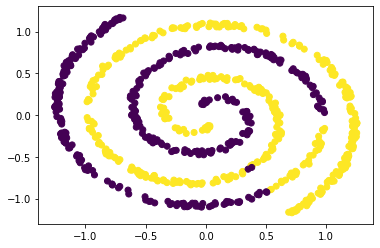

In [196]:
### It doesnt perform as good as dynamically added case
%matplotlib inline
yout_0 = net_0.forward(xx)
out = (yout_0>0.5).reshape(-1)
plt.scatter(x1, x2, c=out)

### Finding the decision boundary of the surface -- the dynamic case

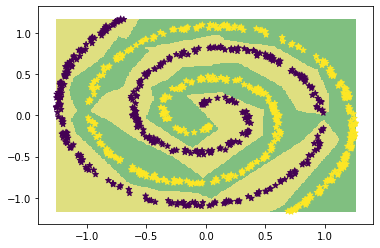

In [197]:
h = 0.01
x_, y_ = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xx_img = np.c_[x_.ravel(), y_.ravel()]
yout_img = net_.forward(xx_img)
# out = (yout_img>0.5).reshape(-1).astype(int)
out = yout_img

colors = ['r', 'y', 'g', 'b']
plt.imshow(out.reshape(x_.shape), interpolation='nearest',
           extent=(x_.min(), x_.max(), y_.min(), y_.max()),
           cmap=matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')